In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x, y, a, b, c = sp.symbols('x y a b c')

In [6]:
T_bus = a*x**2 + b*y**2
T_taxi = c*(x**2 + y**2)

In [7]:
grad_bus_x = sp.diff(T_bus, x)
grad_bus_y = sp.diff(T_bus, y)
grad_taxi_x = sp.diff(T_taxi, x)
grad_taxi_y = sp.diff(T_taxi, y)

In [13]:
print("Bus gradient parts:")
print("dT_b/dx =", grad_bus_x)
print("dT_b/dy =", grad_bus_y)
print()
print("Taxi gradient parts:")
print("dT_t/dx =", grad_taxi_x)
print("dT_t/dy =", grad_taxi_y)
print()

Bus gradient parts:
dT_b/dx = 2*a*x
dT_b/dy = 2*b*y

Taxi gradient parts:
dT_t/dx = 2*c*x
dT_t/dy = 2*c*y



In [28]:
x_val = 4.5
y_val = 2.0
a_val = 0.1
b_val = 0.3
c_val = 0.2

print("Using Colombo values:")
print("x =", x_val, "km")
print("y =", y_val, "min/km")
print("a =", a_val, "b =", b_val, "c =", c_val)
print()

Using Colombo values:
x = 4.5 km
y = 2.0 min/km
a = 0.1 b = 0.3 c = 0.2



In [14]:
grad_bus_x_val = float(grad_bus_x.subs({'a': a_val, 'x': x_val}))
grad_bus_y_val = float(grad_bus_y.subs({'b': b_val, 'y': y_val}))
grad_taxi_x_val = float(grad_taxi_x.subs({'c': c_val, 'x': x_val}))
grad_taxi_y_val = float(grad_taxi_y.subs({'c': c_val, 'y': y_val}))

print("Numerical values:")
print("Bus dT_b/dx =", round(grad_bus_x_val, 3))
print("Bus dT_b/dy =", round(grad_bus_y_val, 3))
print("Taxi dT_t/dx =", round(grad_taxi_x_val, 3))
print("Taxi dT_t/dy =", round(grad_taxi_y_val, 3))
print()

In [16]:
print("Impact analysis:")
if abs(grad_bus_x_val) > abs(grad_bus_y_val):
    print("Bus: Distance has more impact")
else:
    print("Bus: Traffic has more impact")

if abs(grad_taxi_x_val) > abs(grad_taxi_y_val):
    print("Taxi: Distance has more impact")
else:
    print("Taxi: Traffic has more impact")
print()

Impact analysis:
Bus: Traffic has more impact
Taxi: Distance has more impact



In [17]:
T_bus_val = a_val*x_val**2 + b_val*y_val**2
T_taxi_val = c_val*(x_val**2 + y_val**2)
print("Travel times:")
print("Bus time:", round(T_bus_val, 1), "minutes")
print("Taxi time:", round(T_taxi_val, 1), "minutes")
print()

Travel times:
Bus time: 3.2 minutes
Taxi time: 4.9 minutes



In [31]:
x_plot = np.linspace(1, 5, 50)
y_plot = np.linspace(0.5, 4, 50)

bus_grad_x_plot = 2*a_val*x_plot
bus_grad_y_plot = 2*b_val*y_plot
taxi_grad_x_plot = 2*c_val*x_plot
taxi_grad_y_plot = 2*c_val*y_plot

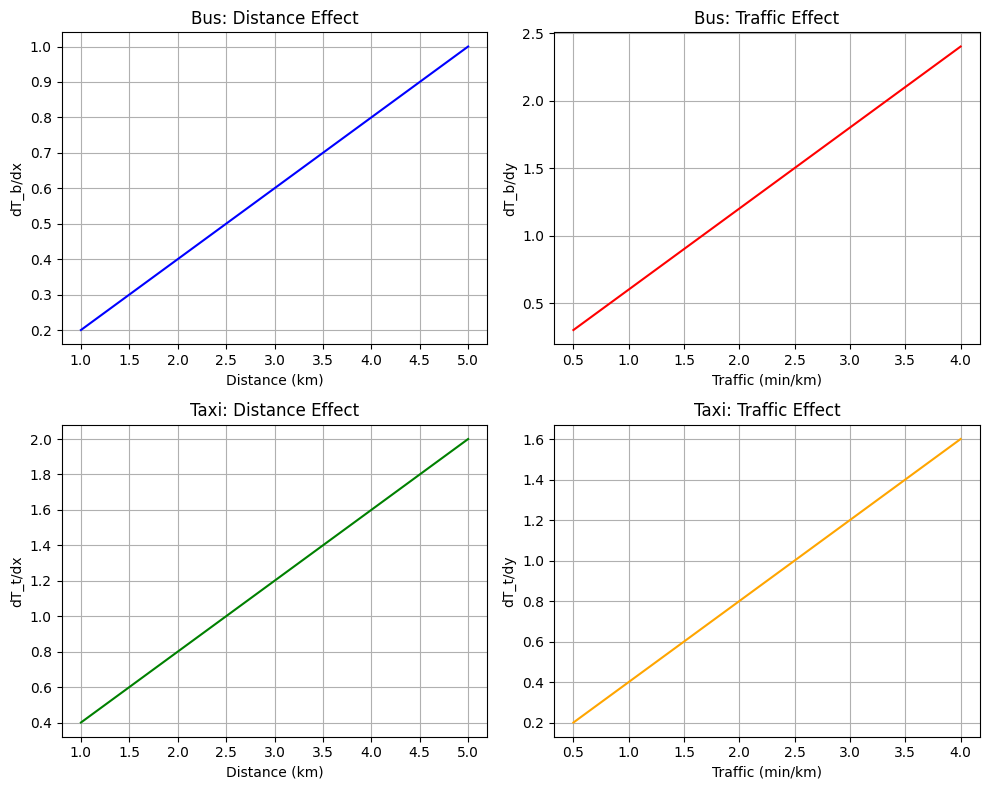

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0,0].plot(x_plot, bus_grad_x_plot, 'b-')
axs[0,0].set_xlabel('Distance (km)')
axs[0,0].set_ylabel('dT_b/dx')
axs[0,0].set_title('Bus: Distance Effect')
axs[0,0].grid(True)

axs[0,1].plot(y_plot, bus_grad_y_plot, 'r-')
axs[0,1].set_xlabel('Traffic (min/km)')
axs[0,1].set_ylabel('dT_b/dy')
axs[0,1].set_title('Bus: Traffic Effect')
axs[0,1].grid(True)

axs[1,0].plot(x_plot, taxi_grad_x_plot, 'g-')
axs[1,0].set_xlabel('Distance (km)')
axs[1,0].set_ylabel('dT_t/dx')
axs[1,0].set_title('Taxi: Distance Effect')
axs[1,0].grid(True)

axs[1,1].plot(y_plot, taxi_grad_y_plot, 'orange')
axs[1,1].set_xlabel('Traffic (min/km)')
axs[1,1].set_ylabel('dT_t/dy')
axs[1,1].set_title('Taxi: Traffic Effect')
axs[1,1].grid(True)

plt.tight_layout()
plt.show()